In [14]:
target_url = 'https://raw.githubusercontent.com/Cosmic-rare/result-database-jupyter/main/targets/fastlate.png'

In [48]:
import os
from PIL import Image
import pyocr
import pyocr.builders
import requests
import io
import matplotlib.pyplot as plt

In [16]:
def openImg(url):
  return Image.open(io.BytesIO(requests.get(url).content))

In [17]:
path_tesseract = "C:\\Program Files\\Tesseract-OCR"
if path_tesseract not in os.environ["PATH"].split(os.pathsep):
    os.environ["PATH"] += os.pathsep + path_tesseract

tools = pyocr.get_available_tools()
tool = tools[0]

In [18]:
img = openImg(target_url)
rgb_img = img.convert('RGB')
size = rgb_img.size

In [19]:
# crop_img = rgb_img.crop([0, size[1] / 2, size[0] / 3 * 2, size[1] / 8 * 7])

crop_img = rgb_img
crop_size = crop_img.size

In [30]:
img2 = Image.new('RGBA', crop_size)

border = 215

for x in range(crop_size[0]):
  for y in range(crop_size[1]):
    r, g, b = crop_img.getpixel((x, y))

    if border<r and border<g and border<b :
        a = 0
    else:
        a = 225

    img2.putpixel((x, y), (a, a, a, 255))

In [20]:
img2 = Image.new('RGBA', crop_size)

color_range = 25

for x in range(crop_size[0]):
  for y in range(crop_size[1]):
    r, g, b = crop_img.getpixel((x, y))

    if 114-color_range < r < 144+color_range and 241-color_range < g < 241+color_range and 219-color_range < b < 219+color_range:
        a = 0
    elif 108-color_range < r < 108+color_range and 193-color_range < g < 193+color_range and 190-color_range < b < 190+color_range:
        a = 0
    if 115-color_range < r < 115+color_range and 233-color_range < g < 233+color_range and 215-color_range < b < 215+color_range:
        a = 0
    else:
        a = 225

    img2.putpixel((x, y), (a, a, a, 255))

    # for i in range(-2, 3):
    #     for j in range(-2, 3):
    #         try:
    #             img2.putpixel((x+i, y+j), (a, a, a, 255))
    #         except:
    #             pass

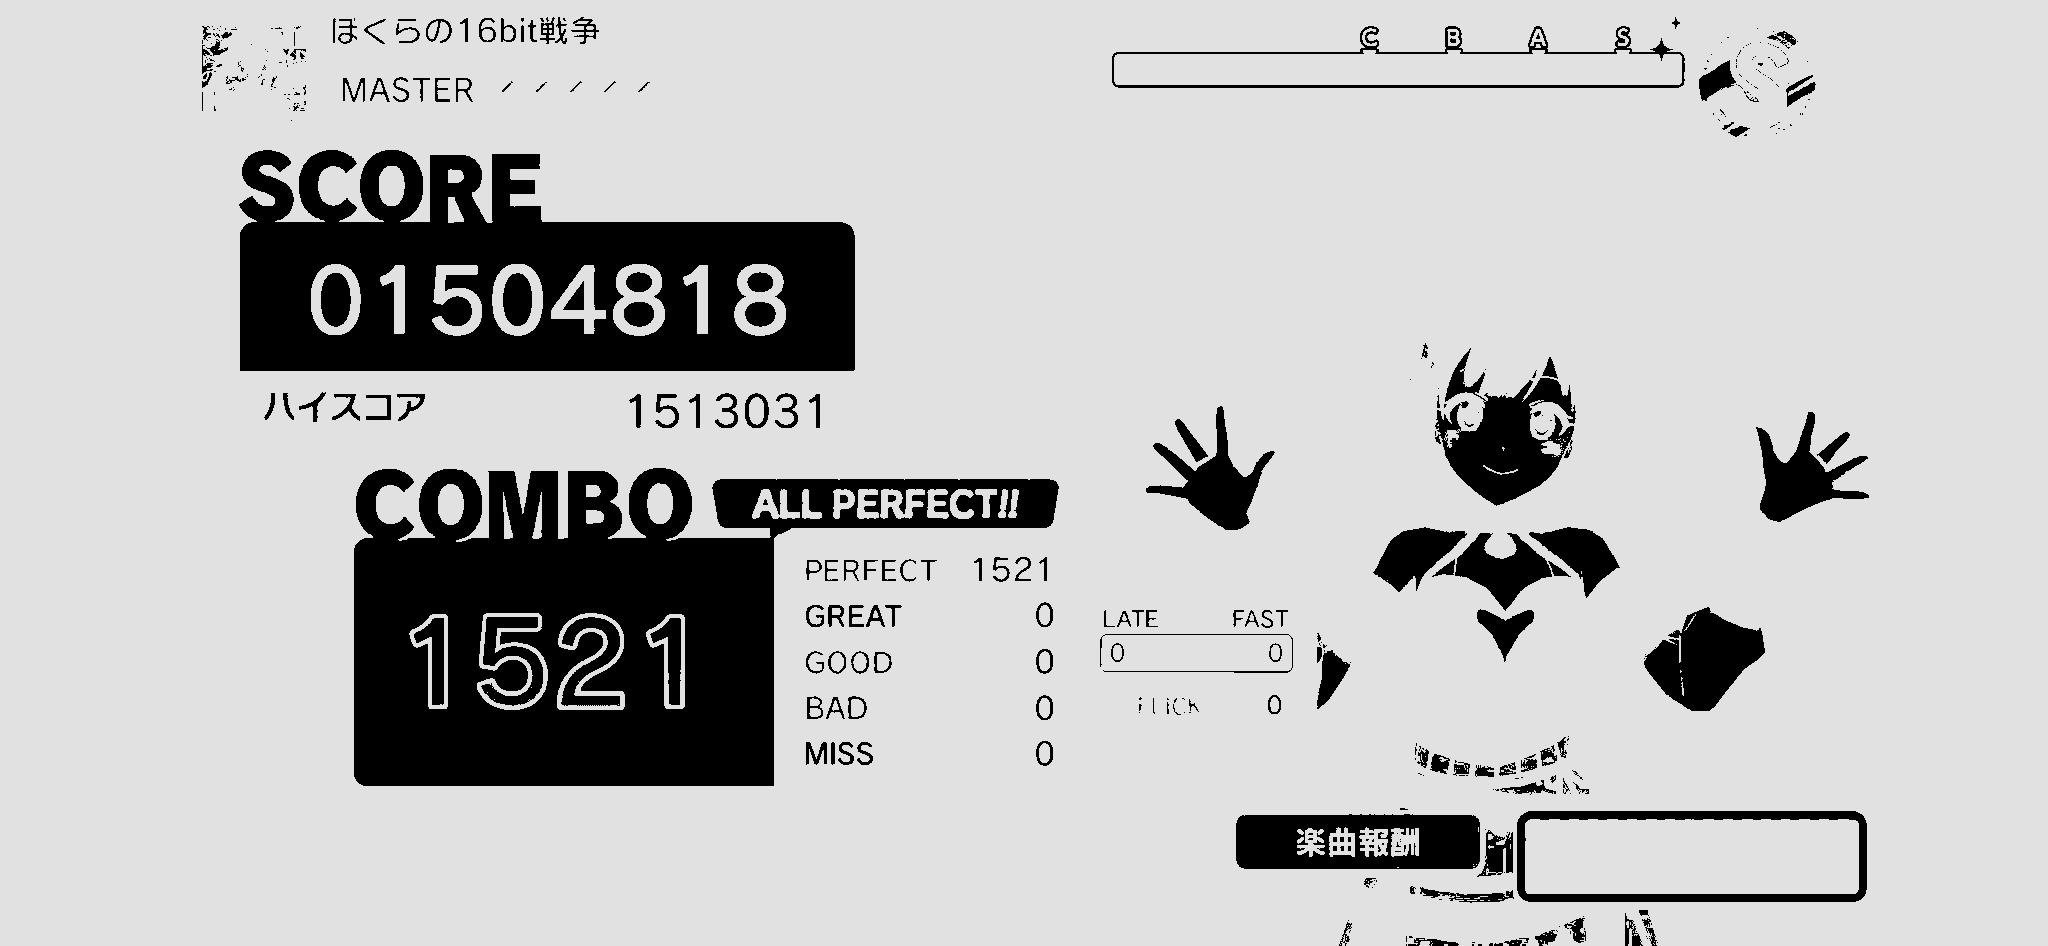

In [31]:
img2

In [38]:
builder = pyocr.builders.WordBoxBuilder (tesseract_layout=11)
builder.tesseract_configs.append("-c")
builder.tesseract_configs.append('tessedit_char_whitelist="COMBO"')
result = tool.image_to_string(crop_img, lang="eng", builder=builder)

In [45]:
imgimg = cv2.imread('../targets/fastlate.png')

for box in result:
    cv2.rectangle(imgimg, box.position[0], box.position[1], (0, 0, 255), 2)
    print("word: {}, pos: {}".format(box.content, box.position))

word: B, pos: ((270, 26), (307, 75))
word: O, pos: ((332, 16), (599, 45))
word: M, pos: ((328, 69), (660, 111))
word: BC, pos: ((802, 555), (1048, 586))
word: OOOO, pos: ((973, 602), (1054, 628))
word: OOOO, pos: ((973, 648), (1054, 674))
word: OOOO, pos: ((971, 695), (1054, 721))
word: C, pos: ((1100, 693), (1206, 719))
word: O, pos: ((983, 747), (1031, 765))
word: B, pos: ((1652, 838), (1732, 876))


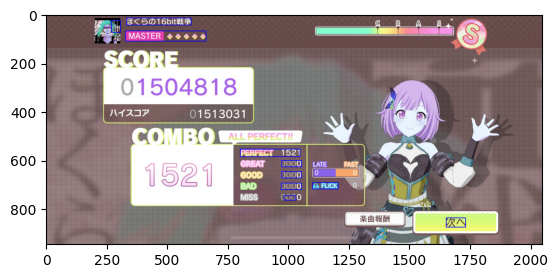

In [49]:
import cv2

plt.imshow(imgimg)